In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import missingno as msno

In [296]:
# Chargement des données
ins_prof_dut = pd.read_csv("../csv/fr-esr-insertion_professionnelle-dut_donnees_nationales.csv", sep=";")
ins_prof_lp = pd.read_csv("../csv//fr-esr-insertion_professionnelle-lp_donnees_nationales.csv", sep=";")
ins_prof_master = pd.read_csv("../csv/fr-esr-insertion_professionnelle-master_donnees_nationales.csv", sep=";")
ins_prof_doctorat = pd.read_csv("../csv/fr-esr-insertion-professionnelle-doctorat-par-discipline.csv", sep=";")

1. Etude de l'insertion professonnelle des DUT, licences pro et Master 

In [297]:
# Agrégation de toutes les formations (DUT, LP, MASTER)
ins_prof = pd.concat([ins_prof_dut, ins_prof_lp, ins_prof_master], keys=["D", "L", "M"])

In [298]:
ins_prof.head()

Année Diplôme                 situation             Genre  \
D 0  2013     DUT  30 mois après le diplôme            hommes   
  1  2017     DUT  18 mois après le diplôme  femmes et hommes   
  2  2017     DUT  18 mois après le diplôme            hommes   
  3  2017     DUT  18 mois après le diplôme  femmes et hommes   
  4  2017     DUT  18 mois après le diplôme            femmes   

                                           Disciplines Code du domaine  \
D 0  Droit, économie et gestion>Droit>Carrières jur...             DEG   
  1  Sciences, technologies et santé>Informatique>I...             STS   
  2  Sciences, technologies et santé>Informatique>I...             STS   
  3  Sciences humaines et sociales>Information comm...             SHS   
  4  Sciences humaines et sociales>Information comm...             SHS   

                             Domaine Code de la discipline  \
D 0       Droit, économie et gestion                disc02   
  1  Sciences, technologies et santé                disc16   
  2  Sciences, technologies et santé                disc16   
  3    Sciences humaines et sociales                disc10   
  4    Sciences humaines et sociales                disc10   

                    Discipline Sigle  ... Secteur disciplinaire  \
D 0                      Droit   NaN  ...                   NaN   
  1               Informatique   NaN  ...                   NaN   
  2               Informatique   NaN  ...                   NaN   
  3  Information communication   NaN  ...                   NaN   
  4  Information communication   NaN  ...                   NaN   

     Administration publique (hors ens.)  \
D 0                                  NaN   
  1                                  NaN   
  2                                  NaN   
  3                                  NaN   
  4                                  NaN   

    Prof. libérale, indépendant, chef d’entreprise  \
D 0                                            NaN   
  1                                            NaN   
  2                                            NaN   
  3                                            NaN   
  4                                            NaN   

    Contrat de professionnalisation  \
D 0                             NaN   
  1                             NaN   
  2                             NaN   
  3                             NaN   
  4                             NaN   

    La fonction publique (d'etat, territoriale ou hospitalière)  \
D 0                                                NaN            
  1                                                NaN            
  2                                                NaN            
  3                                                NaN            
  4                                                NaN            

    Organisation internationale ou une institution de l'Union européenne  \
D 0                                                NaN                     
  1                                                NaN                     
  2                                                NaN                     
  3                                                NaN                     
  4                                                NaN                     

    Société d'économie mixte Agriculture, sylviculture et pêche  \
D 0                      NaN                                NaN   
  1                      NaN                                NaN   
  2                      NaN                                NaN   
  3                      NaN                                NaN   
  4                      NaN                                NaN   

    Artisan, commerçant, chef d'entreprise  \
D 0                                    NaN   
  1                                    NaN   
  2                                    NaN   
  3                                    NaN   
  4                                    NaN   

    Ingénieur, cadre, prof.

In [299]:
# Liste des variables pour les DUT, Licences et Masters
ins_prof.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5920 entries, ('D', 0) to ('M', 2924)
Data columns (total 86 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Année                                                                  5920 non-null   object 
 1   Diplôme                                                                5920 non-null   object 
 2   situation                                                              5920 non-null   object 
 3   Genre                                                                  5920 non-null   object 
 4   Disciplines                                                            5920 non-null   object 
 5   Code du domaine                                                        5920 non-null   object 
 6   Domaine                                                                592

In [300]:
# Listes des variables pour les doctorants
ins_prof_doctorat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Année d’obtention                                                                240 non-null    int64  
 1   Diplôme                                                                          240 non-null    object 
 2   Situation                                                                        240 non-null    object 
 3   Discipline principale agrégée                                                    240 non-null    object 
 4   Discipline principale                                                            240 non-null    object 
 5   Genre                                                                            240 non-null    object 
 6   Nombre de 

In [301]:
ins_prof.reset_index(inplace=True)

In [302]:
ins_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 88 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   level_0                                                                5920 non-null   object 
 1   level_1                                                                5920 non-null   int64  
 2   Année                                                                  5920 non-null   object 
 3   Diplôme                                                                5920 non-null   object 
 4   situation                                                              5920 non-null   object 
 5   Genre                                                                  5920 non-null   object 
 6   Disciplines                                                            5920 non-null   o

In [303]:
ins_prof.drop("level_1", axis=1, inplace=True)
ins_prof.rename(columns={"level_0": "label"}, inplace=True)

In [304]:
ins_prof["Diplôme"].unique()

array(['DUT', 'LICENCE PRO', 'MASTER LMD', 'MASTER ENS'], dtype=object)

In [305]:
ins_prof.head()

,label,Année,Diplôme,situation,Genre,Disciplines,Code du domaine,Domaine,Code de la discipline,Discipline,...,Secteur disciplinaire,Administration publique (hors ens.),"Prof. libérale, indépendant, chef d’entreprise",Contrat de professionnalisation,"La fonction publique (d'etat, territoriale ou hospitalière)",Organisation internationale ou une institution de l'Union européenne,Société d'économie mixte,"Agriculture, sylviculture et pêche","Artisan, commerçant, chef d'entreprise","Ingénieur, cadre, prof. libérales, prof. intellectuelles sup"
0,D,2013,DUT,30 mois après le diplôme,hommes,"Droit, économie et gestion>Droit>Carrières jur...",DEG,"Droit, économie et gestion",disc02,Droit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D,2017,DUT,18 mois après le diplôme,femmes et hommes,"Sciences, technologies et santé>Informatique>I...",STS,"Sciences, technologies et santé",disc16,Informatique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D,2017,DUT,18 mois après le diplôme,hommes,"Sciences, technologies et santé>Informatique>I...",STS,"Sciences, technologies et santé",disc16,Informatique,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,2017,DUT,18 mois après le diplôme,femmes et hommes,Sciences humaines et sociales>Information comm...,SHS,Sciences humaines et sociales,disc10,Information communication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D,2017,DUT,18 mois après le diplôme,femmes,Sciences humaines et sociales>Information comm...,SHS,Sciences humaines et sociales,disc10,Information communication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:
ins_prof[ins_prof["label"] == "D"]["Année"].unique()

array(['2013', '2017', '2014', '2019', "'2019", '2015', '2016', "'2013",
       "'2014", "'2015", "'2017", "'2016"], dtype=object)

In [307]:
# Liste des codes du domaine des diplômes
ins_prof["Code du domaine"].unique()

array(['DEG', 'STS', 'SHS', 'ALL', 'LLA', 'MEEF'], dtype=object)

In [308]:
# Délais d'insertion après diplôme
ins_prof["situation"].unique()

array(['30 mois après le diplôme', '18 mois après le diplôme'],
      dtype=object)

In [309]:
# Sélection des variables correspondant aux métiers
df_metier = ins_prof.iloc[:, 32:89]

In [310]:
# Ajout de l'indication de l'année
df = ins_prof[["Année", "label", "Diplôme"]].join(df_metier)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 58 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Année                                                                  5920 non-null   object
 1   label                                                                  5920 non-null   object
 2   Diplôme                                                                5920 non-null   object
 3   Fonctionnaire                                                          1502 non-null   object
 4   CDI                                                                    1502 non-null   object
 5   CDI de chantier ou CDI de mission                                      1079 non-null   object
 6   Contrat spécifique au doctorat                                         183 non-null    object
 7

In [312]:
# renommage de la variable "Contrat de professionnalisa tion"
df.rename(columns={"Contrat de professionnalisa tion": "Contrat de professionnalisation"}, inplace=True)

In [313]:
# Suppression des lignes dont toutes valeurs des variables sont manquantes
df.dropna(subset=df.columns[1:], how='all', inplace=True)

In [314]:
# Sélection des types de contrats
df_contrat = df.iloc[:, 1:15]

In [315]:
# Recherche des valeurs représentant l'année
df['Année'].unique()

array(['2013', '2017', '2014', '2019', "'2019", '2015', '2016', "'2013",
       "'2014", "'2015", "'2017", "'2016", '2018', "'2018", 2013, 2014,
       2012, 2011, 2019, 2016, 2015, 2018, 2017], dtype=object)

In [316]:
# Extraction des années
years = df['Année'].astype(str).str.extract(r"([0-9]{4})", expand=True)

In [317]:
years

,0
0,2013
1,2017
2,2017
3,2017
4,2017
...,...
5915,2013
5916,2019
5917,2015
5918,2015


In [318]:
# Renommage de la colonne des années
years = years.rename(columns={0: "Année"})
# ajout de la colonne des années à la DataFrame stockant les contrats
df_contrat = years.join(df_contrat)
# Changement de type en integer de la colonne des années
df_contrat["Année"] = df_contrat["Année"].astype(int)

In [319]:
df_contrat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5920 entries, 0 to 5919
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Année                                       5920 non-null   int64 
 1   label                                       5920 non-null   object
 2   Diplôme                                     5920 non-null   object
 3   Fonctionnaire                               1502 non-null   object
 4   CDI                                         1502 non-null   object
 5   CDI de chantier ou CDI de mission           1079 non-null   object
 6   Contrat spécifique au doctorat              183 non-null    object
 7   CDD                                         1502 non-null   object
 8   Vacataire                                   1502 non-null   object
 9   Intérimaire                                 1502 non-null   object
 10  Intermittent du spectacl

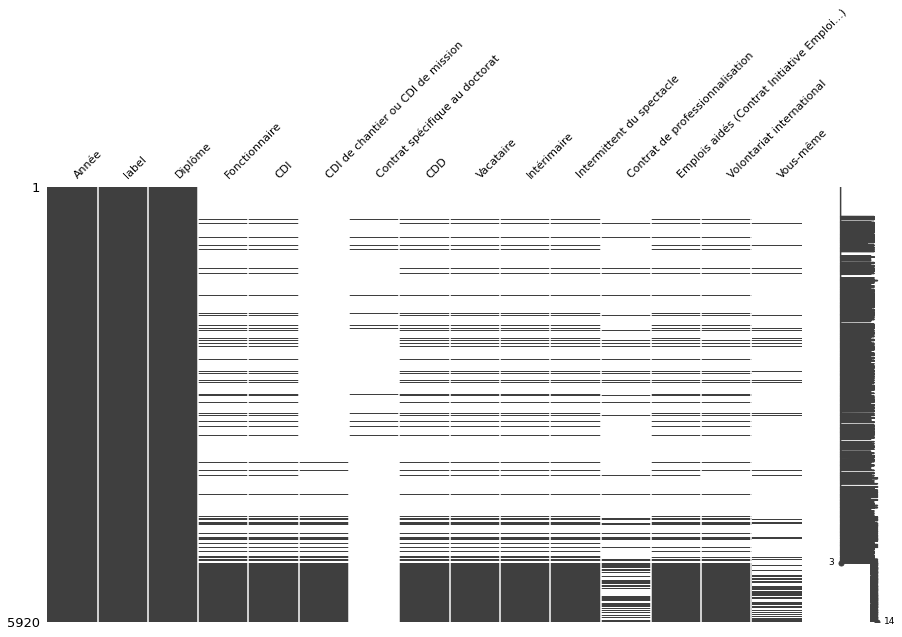

In [320]:
# Recherche des valeurs manquantes par type de contrats
msno.matrix(df_contrat.sort_values("Année"), fontsize=11, figsize=(15,8))
plt.show()

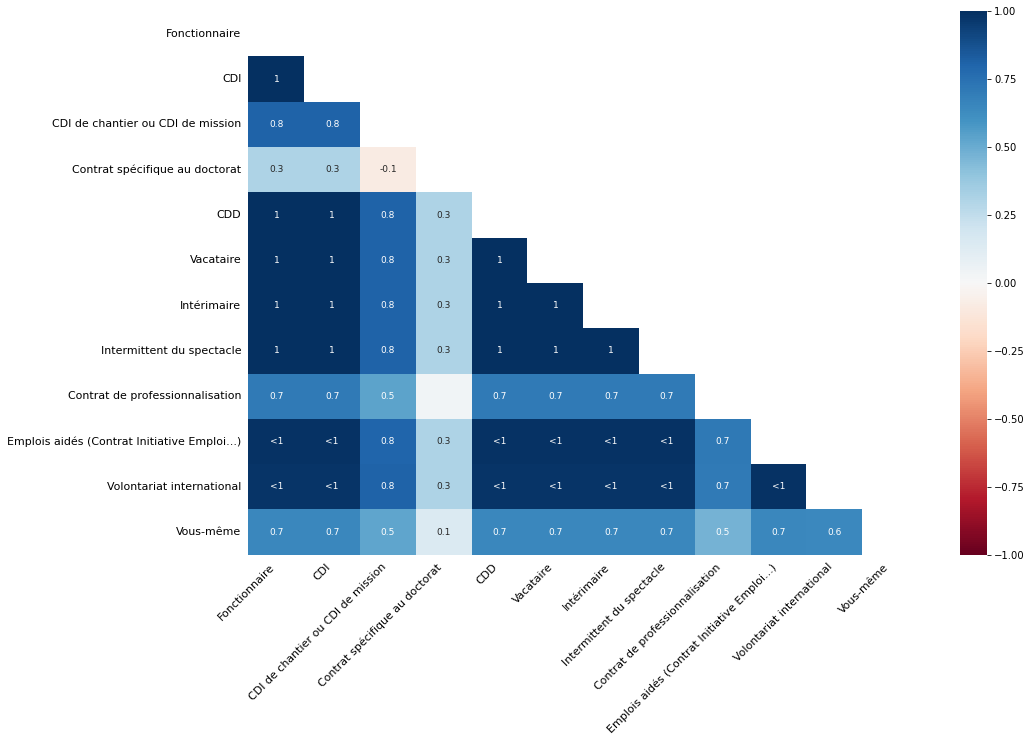

In [321]:
msno.heatmap(df_contrat.sort_values("Année"), fontsize=11, figsize=(15,10))
plt.show()

In [322]:
# Remplacement des valeurs maquantes par la valeur 0
df_contrat = df_contrat.replace([pd.NA, "ns", "nd"], 0)

In [323]:
# Changement de type de variable
val = df_contrat[df_contrat.columns[3:]].astype(int)
df_contrat = df_contrat[["Année", "label", "Diplôme"]].join(val)

In [324]:
df_contrat

,Année,label,Diplôme,Fonctionnaire,CDI,CDI de chantier ou CDI de mission,Contrat spécifique au doctorat,CDD,Vacataire,Intérimaire,Intermittent du spectacle,Contrat de professionnalisation,Emplois aidés (Contrat Initiative Emploi…),Volontariat international,Vous-même
0,2013,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
1,2017,D,DUT,2,78,0,0,14,0,2,0,3,0,1,0
2,2017,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
3,2017,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
4,2017,D,DUT,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,2013,M,MASTER ENS,0,0,0,0,0,0,0,0,0,0,0,0
5916,2019,M,MASTER ENS,76,8,0,0,14,1,0,0,0,0,0,1
5917,2015,M,MASTER ENS,0,0,0,0,0,0,0,0,0,0,0,0
5918,2015,M,MASTER ENS,0,0,0,0,0,0,0,0,0,0,0,0


In [325]:
# Calcul du nombre de chacun des contrats par année
contrat_count = df_contrat.groupby(["Année", "label", "Diplôme"]).sum()
#contrat_count.reset_index(inplace=True)

In [326]:
contrat_count.head()

Fonctionnaire   CDI  \
Année label Diplôme                           
2011  M     MASTER ENS              0     0   
            MASTER LMD              0     0   
2012  M     MASTER ENS              0     0   
            MASTER LMD              0     0   
2013  D     DUT                   117  1286   

                        CDI de chantier ou CDI de mission  \
Année label Diplôme                                         
2011  M     MASTER ENS                                  0   
            MASTER LMD                                  0   
2012  M     MASTER ENS                                  0   
            MASTER LMD                                  0   
2013  D     DUT                                         0   

                        Contrat spécifique au doctorat  CDD  Vacataire  \
Année label Diplôme                                                      
2011  M     MASTER ENS                               0    0          0   
            MASTER LMD                               0    0          0   
2012  M     MASTER ENS                               0    0          0   
            MASTER LMD                               0    0          0   
2013  D     DUT                                      0  597         13   

                        Intérimaire  Intermittent du spectacle  \
Année label Diplôme                                              
2011  M     MASTER ENS            0                          0   
            MASTER LMD            0                          0   
2012  M     MASTER ENS            0                          0   
            MASTER LMD            0                          0   
2013  D     DUT                 122                          6   

                        Contrat de professionnalisation  \
Année label Diplôme                                       
2011  M     MASTER ENS                                0   
            MASTER LMD                                0   
2012  M     MASTER ENS                                0   
            MASTER LMD                                0   
2013  D     DUT                                      23   

                        Emplois aidés (Contrat Initiative Emploi…)  \
Année label Diplôme                                                  
2011  M     MASTER ENS                                           0   
            MASTER LMD                                           0   
2012  M     MASTER ENS                                           0   
            MASTER LMD                                           0   
2013  D     DUT                                                 48   

                        Volontariat international  Vous-même  
Année label Diplôme                                           
2011  M     MASTER ENS                          0          0  
            MASTER LMD                          0          0  
2012  M     MASTER ENS                          0          0  
            MASTER LMD                          0          0  
2013  D     DUT                                 2         40

In [327]:
# Suppression des années 2011-2012 dont toutes les valeurs sont manquantes
contrat_count.drop([2011, 2012], axis=0, inplace=True)

In [328]:
# total du nombre de contrat par année et par diplôme
contrat_count["total"] = contrat_count.sum(axis=1)

In [329]:
contrat_count.reset_index(inplace=True)

In [330]:
df_contrat = contrat_count.melt(id_vars=["Année", "label", "Diplôme", "total"], value_vars=contrat_count.columns, var_name="contrat", value_name="nb")

In [331]:
# Pourcentage d'insertion pour chaque type de contrat par année
df_contrat["%"] = (round(df_contrat["nb"] / df_contrat["total"] * 100, 1)).fillna(0)

In [332]:
df_contrat

,Année,label,Diplôme,total,contrat,nb,%
0,2013,D,DUT,2254,Fonctionnaire,117,5.2
1,2013,L,LICENCE PRO,3525,Fonctionnaire,139,3.9
2,2013,M,MASTER ENS,197,Fonctionnaire,164,83.2
3,2013,M,MASTER LMD,3520,Fonctionnaire,202,5.7
4,2014,D,DUT,2546,Fonctionnaire,216,8.5
...,...,...,...,...,...,...,...
319,2018,M,MASTER LMD,8721,Vous-même,150,1.7
320,2019,D,DUT,10869,Vous-même,271,2.5
321,2019,L,LICENCE PRO,18506,Vous-même,479,2.6
322,2019,M,MASTER ENS,597,Vous-même,3,0.5


In [333]:
df_graph = df_contrat.pivot_table(index="Année", values="%", columns="contrat")

In [334]:
df_graph.head()

contrat,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisation,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,
2013,22.250,45.650,0.000,0.300,0.0,1.425,24.50,0.450,2.975,0.850,0.300,1.275
2014,23.400,44.550,0.000,0.500,0.0,1.125,24.50,0.350,3.150,0.800,0.375,1.200
2015,22.150,45.525,0.000,0.425,0.0,1.150,24.75,0.375,3.325,0.725,0.375,1.175
2016,21.025,46.650,0.000,0.550,0.0,0.550,24.85,0.500,3.150,0.600,0.400,1.725
2017,20.925,48.150,0.225,0.475,0.0,0.100,24.05,0.375,2.750,0.750,0.425,1.700


In [335]:
# Changement de l'ordre des colonnes selon la valeur maximale de chacune d'entre elles.
col_order = df_graph.max().sort_values().index

In [336]:
# Calcul de l'écart type par année
errors = df_graph.std(axis=1)

In [337]:
errors 

Année
2013    14.647153
2014    14.503271
2015    14.639735
2016    14.822389
2017    15.118379
2018    14.838930
2019    14.937755
dtype: float64

In [338]:
# Axe des ordonnées. Récupération des valeurs de chaque type de contrat depuis un dictionnaire
y = df_graph[col_order].to_dict('list').values()

# Axes abscisses en année
x = df_graph.index

# Nombre de variables à stacker
nb_var = df_graph.shape[1]

labels = col_order

In [339]:
# Définition des couleurs 
colors = ["cornflowerblue", "mediumslateblue", "gold", 
            "orange", "brown", "darksalmon", 
            "peru", "mediumseagreen", "teal", 
            "slategray", "green", "tan"]

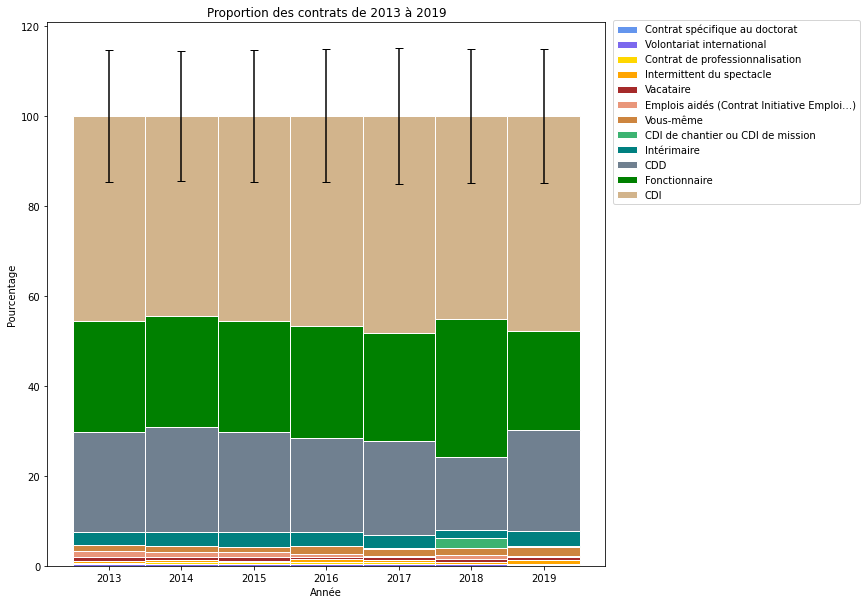

In [340]:

# Création du stacked Barplot
fig, ax = plt.subplots(figsize=(10,10))
# liste des pourcentages par année pour tout niveau de diplôme confondu
for n, height in enumerate(y):
    if n == nb_var - 1:
        # Indication de l'écart type sur le dernier stack
        ax.bar(x, height, width=1, bottom=bottom, yerr=errors, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
    elif n > 0:
        # création du stack courant avec pour base le sommet du précedent
        ax.bar(x, height, width=1, bottom=bottom, edgecolor='white', label=labels[n], color=colors[n])
        # la base du nouveau stack est le sommet du précédent stack 
        bottom = np.add(bottom, height).tolist()
    else:
        # Création de la première barre
        ax.bar(x, height, width=1, edgecolor='white', label=labels[n], color=colors[n])
        # initialisation de la base du 1er stack
        bottom = height
        
fig.legend(bbox_to_anchor=(1.26, 0.89))
plt.xlabel("Année")
plt.ylabel("Pourcentage")
plt.title("Proportion des contrats de 2013 à 2019")
plt.show()

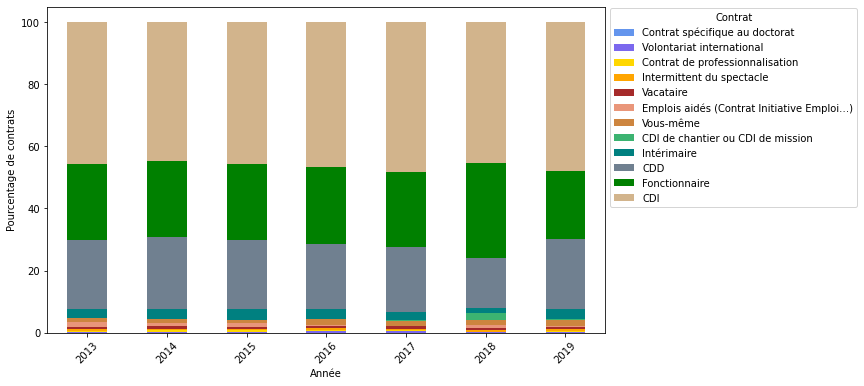

In [341]:
# Graphique du pourcentage par type de contrats selon l'année
fig, ax = plt.subplots()
df_graph[col_order].plot(kind="bar", stacked=True, figsize=(10, 6), ax=ax, color=colors)
plt.legend(title="Contrat", bbox_to_anchor=(1, 1.01))
plt.xticks(rotation=45)
plt.ylabel("Pourcentage de contrats")
plt.show()

In [342]:
# Graphs intégrant le niveau du diplôme
df_graph = df_contrat.pivot_table(index=["Année", "Diplôme"], values="%", columns="contrat")

In [343]:
df_graph.reset_index("Diplôme", inplace=True)

In [344]:
df_graph.head()

contrat,Diplôme,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisation,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,,
2013,DUT,26.5,57.1,0.0,1.0,0.0,2.1,5.2,0.3,5.4,0.6,0.1,1.8
2013,LICENCE PRO,25.0,62.0,0.0,0.2,0.0,2.1,3.9,0.8,4.1,0.5,0.0,1.4
2013,MASTER ENS,9.1,6.1,0.0,0.0,0.0,0.5,83.2,0.0,0.0,1.0,0.0,0.0
2013,MASTER LMD,28.4,57.4,0.0,0.0,0.0,1.0,5.7,0.7,2.4,1.3,1.1,1.9
2014,DUT,28.7,51.8,0.0,1.6,0.0,1.7,8.5,0.2,5.5,0.7,0.0,1.3


In [345]:
df_graph[df_graph["Diplôme"] == "DUT"]

contrat,Diplôme,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisation,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,,
2013,DUT,26.5,57.1,0.0,1.0,0.0,2.1,5.2,0.3,5.4,0.6,0.1,1.8
2014,DUT,28.7,51.8,0.0,1.6,0.0,1.7,8.5,0.2,5.5,0.7,0.0,1.3
2015,DUT,28.5,52.4,0.0,1.3,0.0,2.2,6.9,0.2,6.3,0.7,0.2,1.4
2016,DUT,26.2,55.7,0.0,2.0,0.0,1.1,5.9,0.2,6.7,0.2,0.2,1.8
2017,DUT,25.8,57.3,0.0,1.6,0.0,0.2,6.2,0.0,5.4,1.0,0.2,2.2
2019,DUT,22.5,59.0,0.2,0.6,0.0,0.6,6.8,0.7,6.4,0.6,0.0,2.5


In [346]:
# Sélection par niveau de diplôme
df1 = df_graph[df_graph["Diplôme"] == "DUT"].iloc[:, 1:]
df2 = df_graph[df_graph["Diplôme"] == "LICENCE PRO"].iloc[:, 1:]
df3 = df_graph[df_graph["Diplôme"] == "MASTER ENS"].iloc[:, 1:]
df4 = df_graph[df_graph["Diplôme"] == "MASTER LMD"].iloc[:, 1:]

In [347]:
df1

contrat,CDD,CDI,CDI de chantier ou CDI de mission,Contrat de professionnalisation,Contrat spécifique au doctorat,Emplois aidés (Contrat Initiative Emploi…),Fonctionnaire,Intermittent du spectacle,Intérimaire,Vacataire,Volontariat international,Vous-même
Année,,,,,,,,,,,,
2013,26.5,57.1,0.0,1.0,0.0,2.1,5.2,0.3,5.4,0.6,0.1,1.8
2014,28.7,51.8,0.0,1.6,0.0,1.7,8.5,0.2,5.5,0.7,0.0,1.3
2015,28.5,52.4,0.0,1.3,0.0,2.2,6.9,0.2,6.3,0.7,0.2,1.4
2016,26.2,55.7,0.0,2.0,0.0,1.1,5.9,0.2,6.7,0.2,0.2,1.8
2017,25.8,57.3,0.0,1.6,0.0,0.2,6.2,0.0,5.4,1.0,0.2,2.2
2019,22.5,59.0,0.2,0.6,0.0,0.6,6.8,0.7,6.4,0.6,0.0,2.5


In [348]:
# Ajout de l'année 2018 manquante pour le niveau DUT
df1.loc[2018] = [0] * (df1.shape[1])

In [349]:
df1.sort_index(inplace=True)

In [350]:
df1[labels]

contrat,Contrat spécifique au doctorat,Volontariat international,Contrat de professionnalisation,Intermittent du spectacle,Vacataire,Emplois aidés (Contrat Initiative Emploi…),Vous-même,CDI de chantier ou CDI de mission,Intérimaire,CDD,Fonctionnaire,CDI
Année,,,,,,,,,,,,
2013,0.0,0.1,1.0,0.3,0.6,2.1,1.8,0.0,5.4,26.5,5.2,57.1
2014,0.0,0.0,1.6,0.2,0.7,1.7,1.3,0.0,5.5,28.7,8.5,51.8
2015,0.0,0.2,1.3,0.2,0.7,2.2,1.4,0.0,6.3,28.5,6.9,52.4
2016,0.0,0.2,2.0,0.2,0.2,1.1,1.8,0.0,6.7,26.2,5.9,55.7
2017,0.0,0.2,1.6,0.0,1.0,0.2,2.2,0.0,5.4,25.8,6.2,57.3
2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,0.0,0.0,0.6,0.7,0.6,0.6,2.5,0.2,6.4,22.5,6.8,59.0


In [351]:
# Calcul de l'écart type par année pour chaque niveau de diplôme
errors1 = df1.std(axis=1)
errors2 = df2.std(axis=1)
errors3 = df3.std(axis=1)
errors4 = df4.std(axis=1)

In [352]:
df1.loc[2018, "CDI"] = 0

In [353]:
# définitions des axes des abscisses pour chaque niveau de diplôme
x1 = df1.index
x2, x3, x4 = df2.index, df3.index, df4.index

In [354]:
errors1

Année
2013    17.037310
2014    15.908164
2015    16.009569
2016    16.634757
2017    17.038306
2018     0.000000
2019    17.190490
dtype: float64

In [355]:
# Définition des ordonnées par type de niveau de diplôme
df1 = df1[labels].to_dict('list').values()
df2 = df2[labels].to_dict('list').values()
df3 = df3[labels].to_dict('list').values()
df4 = df4[labels].to_dict('list').values()

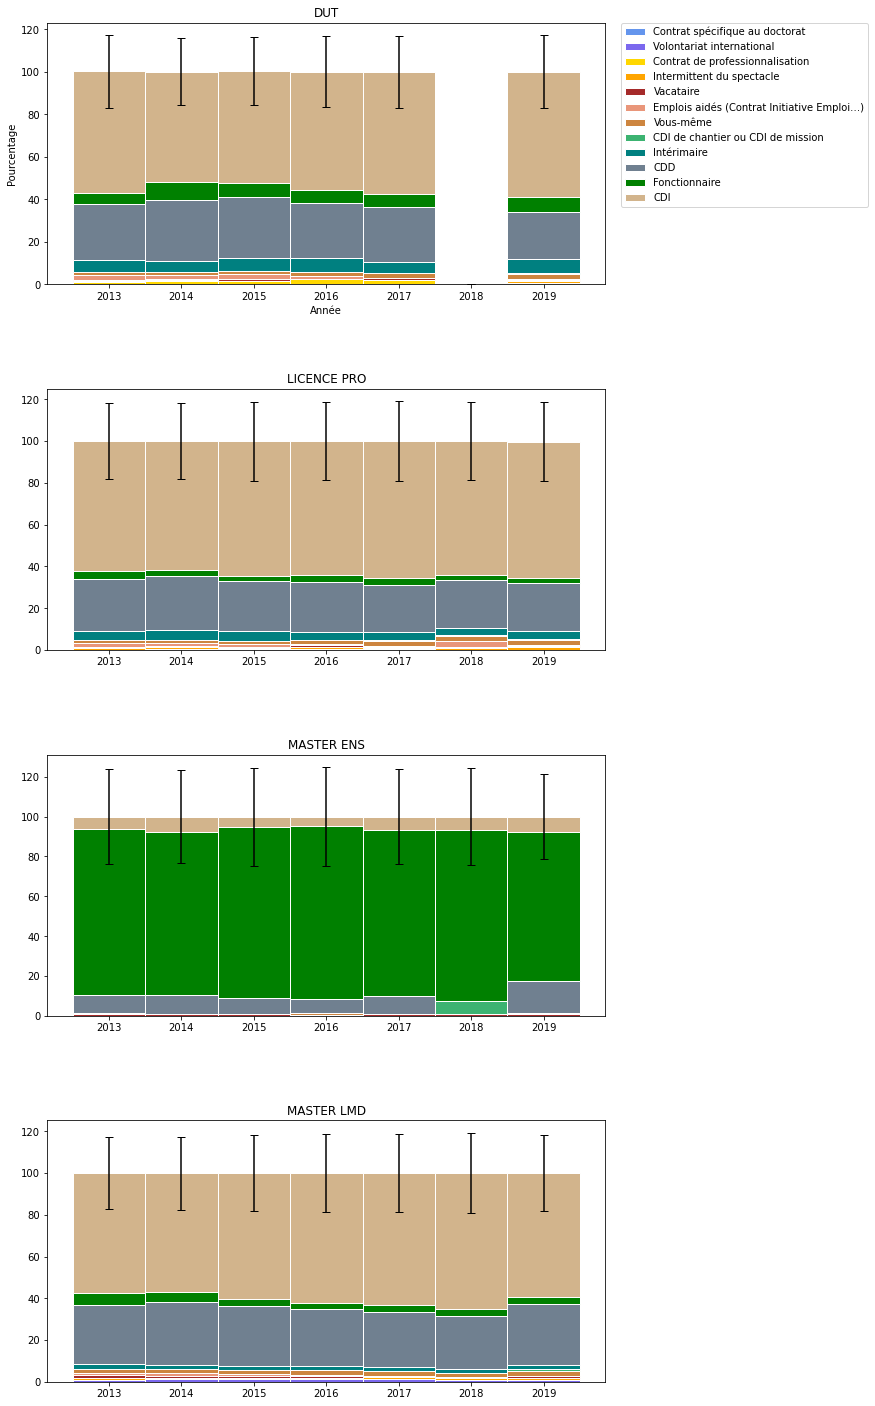

In [356]:
### Création du stacked Barplot ###
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,25), sharex=False)
# Chargement des ordonnées pour chaque niveau de diplôme
for n, (y1, y2, y3, y4) in enumerate(zip(df1, df2, df3, df4)):
    if n == nb_var - 1:
        # Indication de l'écart type sur le dernier stack
        ax1.bar(x1, y1, width=1, bottom=bottom1, yerr=errors1, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
        ax2.bar(x2, y2, width=1, bottom=bottom2, yerr=errors2, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
        ax3.bar(x3, y3, width=1, bottom=bottom3, yerr=errors3, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
        ax4.bar(x4, y4, width=1, bottom=bottom4, yerr=errors4, edgecolor='white', label=labels[n], capsize=4, color=colors[n])
    elif n > 0:
        # création du stack courant avec pour base le sommet du précedent
        ax1.bar(x1, y1, width=1, bottom=bottom1, edgecolor='white', label=labels[n], color=colors[n])
        ax2.bar(x2, y2, width=1, bottom=bottom2, edgecolor='white', label=labels[n], color=colors[n])
        ax3.bar(x3, y3, width=1, bottom=bottom3, edgecolor='white', label=labels[n], color=colors[n])
        ax4.bar(x4, y4, width=1, bottom=bottom4, edgecolor='white', label=labels[n], color=colors[n])
        # la base du nouveau stack est le sommet du précédent stack 
        bottom1 = np.add(bottom1, y1).tolist()
        bottom2 = np.add(bottom2, y2).tolist()
        bottom3 = np.add(bottom3, y3).tolist()
        bottom4 = np.add(bottom4, y4).tolist()
    else:
        # Création de la première barre
        ax1.bar(x1, y1, width=1, edgecolor='white', label=labels[n], color=colors[n])
        ax2.bar(x2, y2, width=1, edgecolor='white', label=labels[n], color=colors[n])
        ax3.bar(x3, y3, width=1, edgecolor='white', label=labels[n], color=colors[n])
        ax4.bar(x4, y4, width=1, edgecolor='white', label=labels[n], color=colors[n])
        # initialisation de la base du 1er stack
        bottom1, bottom2, bottom3, bottom4 = y1, y2, y3, y4
        
ax1.legend(bbox_to_anchor=(1.02, 1.02))
# Titre des graphs
ax1.set_title("DUT")
ax2.set_title("LICENCE PRO")
ax3.set_title("MASTER ENS")
ax4.set_title("MASTER LMD")

ax1.set_xlabel("Année")
ax1.set_ylabel("Pourcentage")

# Décalage de chacun des graphs vers la bas 
plt.subplots_adjust(hspace=0.4)
plt.show()

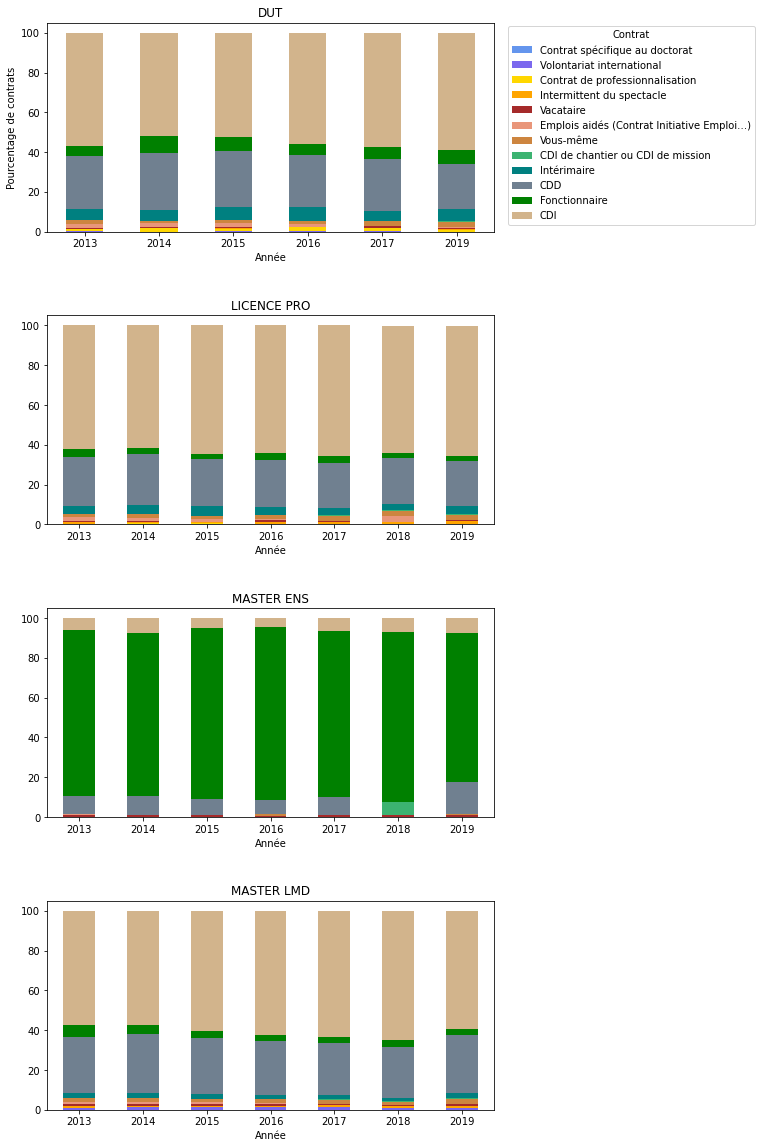

In [357]:
# Sélection par diplôme
df1 = df_graph[df_graph["Diplôme"] == "DUT"]
df2 = df_graph[df_graph["Diplôme"] == "LICENCE PRO"]
df3 = df_graph[df_graph["Diplôme"] == "MASTER ENS"]
df4 = df_graph[df_graph["Diplôme"] == "MASTER LMD"]
# Création des graphs
fig, (ax1,ax2, ax3, ax4) = plt.subplots(4, 1, sharex=False,figsize = (8, 20))
df1[col_order].plot(kind="bar", stacked=True, ax=ax1, legend=True, rot=0, color=colors)
df2[col_order].plot(kind="bar", stacked=True, ax=ax2, legend=False, rot=0, color=colors)
df3[col_order].plot(kind="bar", stacked=True, ax=ax3, legend=False, rot=0, color=colors)
df4[col_order].plot(kind="bar", stacked=True, ax=ax4, legend=False, rot=0, color=colors)
ax1.set_ylabel("Pourcentage de contrats")
# Legende des graphs
ax1.legend(title="Contrat", bbox_to_anchor=(1.02, 1.01))
# Titre des graphs
ax1.set_title("DUT")
ax2.set_title("LICENCE PRO")
ax3.set_title("MASTER ENS")
ax4.set_title("MASTER LMD")
# Décalage de chacun des graphs vers la bas 
plt.subplots_adjust(hspace=0.4)
plt.show()

2. Etude de l'insertion professionnelle des doctorants

In [358]:
ins_prof_doctorat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 21 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   Année d’obtention                                                                240 non-null    int64  
 1   Diplôme                                                                          240 non-null    object 
 2   Situation                                                                        240 non-null    object 
 3   Discipline principale agrégée                                                    240 non-null    object 
 4   Discipline principale                                                            240 non-null    object 
 5   Genre                                                                            240 non-null    object 
 6   Nombre de 

In [359]:
ins_prof_doctorat.rename(columns={"Répartition des docteurs en emploi dans le secteur académique": "secteur académique",
                            "Répartition des docteurs en emploi dans le public hors secteur académique": "public hors secteur académique",
                            "Répartition des docteurs en emploi dans la R&D privée": "R&D privée",
                            "Répartition des docteurs en emploi dans le privé hors secteur académique et R&D": "privé hors secteur académique et R&D",
                            "1er quartile du salaire net mensuel des emplois à temps plein": "1er quartile du salaire net mensuel",
                            "Salaire net mensuel médian des emplois à temps plein": "Salaire net mensuel médian",
                            "3ème quartile du salaire net mensuel des emplois à temps plein": "3ème quartile du salaire net mensuel"},
                            inplace=True)

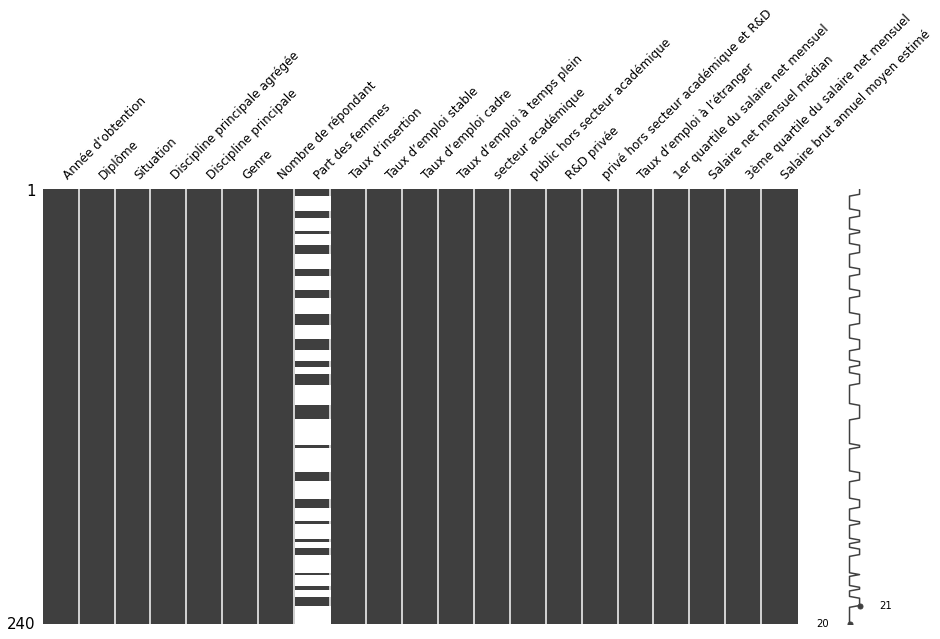

In [360]:
msno.matrix(ins_prof_doctorat, fontsize=12, figsize=(15,8))
plt.show()

In [361]:
# Trie par Genre
df_sort = ins_prof_doctorat.sort_values("Genre")

In [372]:
df_sort

,Année d’obtention,Diplôme,Situation,Discipline principale agrégée,Discipline principale,Genre,Nombre de répondant,Part des femmes,Taux d’insertion,Taux d’emploi stable,...,Taux d’emploi à temps plein,secteur académique,public hors secteur académique,R&D privée,privé hors secteur académique et R&D,Taux d’emploi à l’étranger,1er quartile du salaire net mensuel,Salaire net mensuel médian,3ème quartile du salaire net mensuel,Salaire brut annuel moyen estimé
188,2016,DOCTORAT,12 mois après le diplôme,Sciences de la société,Sciences économiques et de gestion,femmes,174,NaN,90,62,...,91,61,20,6,13,29,1880,2200,2800,36107
61,2014,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Mathématiques et leurs interactions,femmes,103,NaN,87,45,...,95,57,17,11,15,42,ns,ns,ns,ns
60,2014,DOCTORAT,12 mois après le diplôme,Ensemble Sciences et leurs interactions,Sciences et leurs interactions,femmes,996,NaN,86,50,...,97,47,11,20,22,36,1895,2160,2438,32000
131,2016,DOCTORAT,12 mois après le diplôme,Sciences du vivant,Sciences agronomiques et écologiques,femmes,144,NaN,78,35,...,96,63,17,10,11,36,ns,ns,ns,ns
130,2016,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Sciences et TIC,femmes,186,NaN,86,60,...,96,51,6,28,15,29,2000,2300,2617,36936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2014,DOCTORAT,36 mois après le diplôme,Ensemble,Ensemble,hommes,4069,NaN,92,68,...,96,49,16,19,16,36,2125,2468,2904,36168
67,2014,DOCTORAT,12 mois après le diplôme,Sciences humaines et humanités,"Histoire, géographie",hommes,170,NaN,85,58,...,96,37,48,3,12,26,1646,2074,2386,29280
68,2014,DOCTORAT,12 mois après le diplôme,Sciences de la société,"Sciences sociales, sociologie, démographie",hommes,92,NaN,84,56,...,84,45,40,0,15,35,ns,ns,ns,ns
65,2014,DOCTORAT,12 mois après le diplôme,Sciences et leurs interactions,Sciences et TIC,hommes,594,NaN,90,58,...,98,47,6,23,24,33,2047,2255,2500,35000


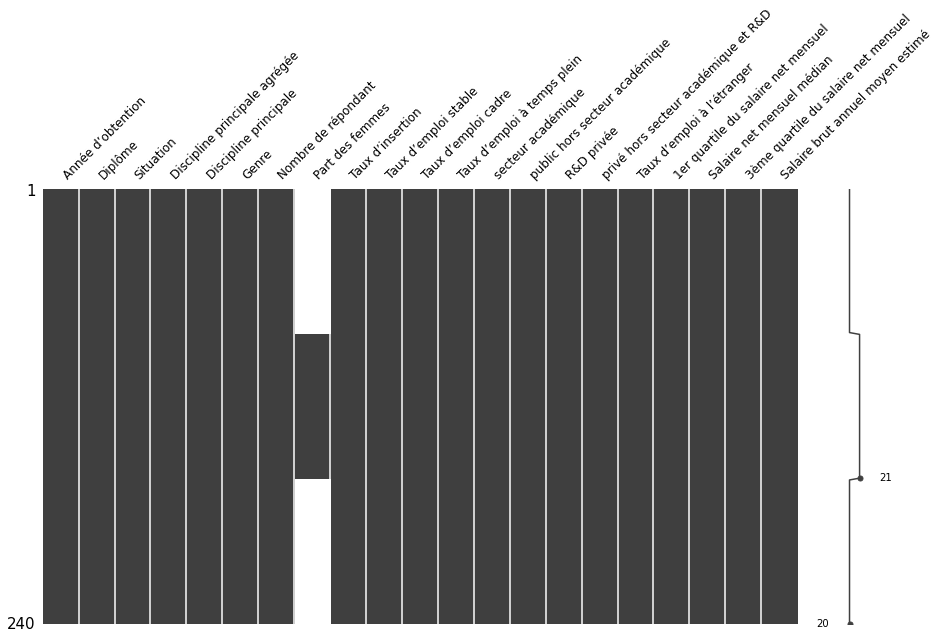

In [362]:
msno.matrix(df_sort, fontsize=12, figsize=(15,8))
plt.show()

In [363]:
#msno.heatmap(ins_prof_doctorat[["Genre", "Part des femmes"]], fontsize=10, figsize=(10,8))
#plt.show()

In [364]:
ins_prof_doctorat.head()

,Année d’obtention,Diplôme,Situation,Discipline principale agrégée,Discipline principale,Genre,Nombre de répondant,Part des femmes,Taux d’insertion,Taux d’emploi stable,...,Taux d’emploi à temps plein,secteur académique,public hors secteur académique,R&D privée,privé hors secteur académique et R&D,Taux d’emploi à l’étranger,1er quartile du salaire net mensuel,Salaire net mensuel médian,3ème quartile du salaire net mensuel,Salaire brut annuel moyen estimé
0,2014,DOCTORAT,36 mois après le diplôme,Sciences et leurs interactions,Mathématiques et leurs interactions,femmes et hommes,364,28.0,94,65,...,98,58,13,15,14,38,2220,2493,2931,36000
1,2014,DOCTORAT,36 mois après le diplôme,Ensemble Sciences humaines et humanités,Sciences humaines et humanités,femmes et hommes,1195,59.0,90,69,...,89,44,40,4,12,28,1843,2263,2593,31944
2,2014,DOCTORAT,36 mois après le diplôme,Ensemble Sciences de la société,Sciences de la société,femmes et hommes,952,50.0,89,74,...,89,52,24,4,20,34,2054,2366,3086,33915
3,2014,DOCTORAT,36 mois après le diplôme,Sciences de la société,Sciences économiques et de gestion,femmes et hommes,356,49.0,93,75,...,92,57,21,8,14,36,2222,2569,3375,36600
4,2014,DOCTORAT,36 mois après le diplôme,Ensemble,Ensemble,femmes,2986,NaN,90,63,...,91,49,22,13,16,31,2000,2281,2692,33396


In [365]:
# colonnes des pourcentages
percent_col = ins_prof_doctorat.columns[7:17] 

# total de personnes pour chaque discipline par année
total = ins_prof_doctorat["Nombre de répondant"]

# Convertion des taux en nombre de personnes
for col in percent_col:
    ins_prof_doctorat["nb_" + col] = round(total * (ins_prof_doctorat[col] / 100))


In [373]:
ins_prof_doctorat.head()

,Année d’obtention,Diplôme,Situation,Discipline principale agrégée,Discipline principale,Genre,Nombre de répondant,Part des femmes,Taux d’insertion,Taux d’emploi stable,...,nb_Part des femmes,nb_Taux d’insertion,nb_Taux d’emploi stable,nb_Taux d’emploi cadre,nb_Taux d’emploi à temps plein,nb_secteur académique,nb_public hors secteur académique,nb_R&D privée,nb_privé hors secteur académique et R&D,nb_Taux d’emploi à l’étranger
0,2014,DOCTORAT,36 mois après le diplôme,Sciences et leurs interactions,Mathématiques et leurs interactions,femmes et hommes,364,28.0,94,65,...,102.0,342.0,237.0,342.0,357.0,211.0,47.0,55.0,51.0,138.0
1,2014,DOCTORAT,36 mois après le diplôme,Ensemble Sciences humaines et humanités,Sciences humaines et humanités,femmes et hommes,1195,59.0,90,69,...,705.0,1076.0,825.0,1028.0,1064.0,526.0,478.0,48.0,143.0,335.0
2,2014,DOCTORAT,36 mois après le diplôme,Ensemble Sciences de la société,Sciences de la société,femmes et hommes,952,50.0,89,74,...,476.0,847.0,704.0,866.0,847.0,495.0,228.0,38.0,190.0,324.0
3,2014,DOCTORAT,36 mois après le diplôme,Sciences de la société,Sciences économiques et de gestion,femmes et hommes,356,49.0,93,75,...,174.0,331.0,267.0,324.0,328.0,203.0,75.0,28.0,50.0,128.0
4,2014,DOCTORAT,36 mois après le diplôme,Ensemble,Ensemble,femmes,2986,NaN,90,63,...,NaN,2687.0,1881.0,2717.0,2717.0,1463.0,657.0,388.0,478.0,926.0


In [367]:
# Nombre de personnes par disciplines et année pour chaque secteur d'insertion professionnel 
df_secteur = ins_prof_doctorat.groupby(["Année d’obtention", "Discipline principale", "Genre"])[["Nombre de répondant", "nb_Part des femmes", "nb_secteur académique", 
                                                                                    "nb_public hors secteur académique", "nb_R&D privée",
                                                                                    "nb_privé hors secteur académique et R&D", "nb_Taux d’emploi à l’étranger"]].sum()

In [368]:
df_secteur.head()

Nombre de répondant  \
Année d’obtention Discipline principale            Genre                                   
2014              Biologie, médecine et santé      femmes                           1438   
                                                   femmes et hommes                 2542   
                                                   hommes                           1104   
                  Chimie et sciences des matériaux femmes                            634   
                                                   femmes et hommes                 1538   

                                                                     nb_Part des femmes  \
Année d’obtention Discipline principale            Genre                                  
2014              Biologie, médecine et santé      femmes                           0.0   
                                                   femmes et hommes              1398.0   
                                                   hommes                           0.0   
                  Chimie et sciences des matériaux femmes                           0.0   
                                                   femmes et hommes               692.0   

                                                                     nb_secteur académique  \
Année d’obtention Discipline principale            Genre                                     
2014              Biologie, médecine et santé      femmes                            913.0   
                                                   femmes et hommes                 1652.0   
                                                   hommes                            739.0   
                  Chimie et sciences des matériaux femmes                            279.0   
                                                   femmes et hommes                  723.0   

                                                                     nb_public hors secteur académique  \
Année d’obtention Discipline principale            Genre                                                 
2014              Biologie, médecine et santé      femmes                                        208.0   
                                                   femmes et hommes                              356.0   
                                                   hommes                                        133.0   
                  Chimie et sciences des matériaux femmes                                         80.0   
                                                   femmes et hommes                              154.0   

                                                                     nb_R&D privée  \
Année d’obtention Discipline principale            Genre                             
2014              Biologie, médecine et santé      femmes                    144.0   
                                                   femmes et hommes          255.0   
                                                   hommes                    110.0   
                  Chimie et sciences des matériaux femmes                    159.0   
                                                   femmes et hommes          384.0   

                                                                     nb_privé hors secteur académique et R&D  \
Année d’obtention Discipline principale            Genre                                                       
2014              Biologie, médecine et santé      femmes                                              172.0   
                                                   femmes et hommes                                    280.0   
                                                   hommes                                              122.0   
                  Chimie et sciences des matériaux femmes                                              117.0   
                                                   femmes et hommes                                    277.0 

In [369]:
# Sélection des colonnes indiquant le nombre de personnes
col_secteur = df_secteur.columns[1:]

# Total de répondants
total = df_secteur["Nombre de répondant"]

# Pourcentage pour chaque secteur
for col in col_secteur:
    df_secteur["%_" + col] = round(df_secteur[col] / total * 100)

In [370]:
df_secteur.head()

Nombre de répondant  \
Année d’obtention Discipline principale            Genre                                   
2014              Biologie, médecine et santé      femmes                           1438   
                                                   femmes et hommes                 2542   
                                                   hommes                           1104   
                  Chimie et sciences des matériaux femmes                            634   
                                                   femmes et hommes                 1538   

                                                                     nb_Part des femmes  \
Année d’obtention Discipline principale            Genre                                  
2014              Biologie, médecine et santé      femmes                           0.0   
                                                   femmes et hommes              1398.0   
                                                   hommes                           0.0   
                  Chimie et sciences des matériaux femmes                           0.0   
                                                   femmes et hommes               692.0   

                                                                     nb_secteur académique  \
Année d’obtention Discipline principale            Genre                                     
2014              Biologie, médecine et santé      femmes                            913.0   
                                                   femmes et hommes                 1652.0   
                                                   hommes                            739.0   
                  Chimie et sciences des matériaux femmes                            279.0   
                                                   femmes et hommes                  723.0   

                                                                     nb_public hors secteur académique  \
Année d’obtention Discipline principale            Genre                                                 
2014              Biologie, médecine et santé      femmes                                        208.0   
                                                   femmes et hommes                              356.0   
                                                   hommes                                        133.0   
                  Chimie et sciences des matériaux femmes                                         80.0   
                                                   femmes et hommes                              154.0   

                                                                     nb_R&D privée  \
Année d’obtention Discipline principale            Genre                             
2014              Biologie, médecine et santé      femmes                    144.0   
                                                   femmes et hommes          255.0   
                                                   hommes                    110.0   
                  Chimie et sciences des matériaux femmes                    159.0   
                                                   femmes et hommes          384.0   

                                                                     nb_privé hors secteur académique et R&D  \
Année d’obtention Discipline principale            Genre                                                       
2014              Biologie, médecine et santé      femmes                                              172.0   
                                                   femmes et hommes                                    280.0   
                                                   hommes                                              122.0   
                  Chimie et sciences des matériaux femmes                                              117.0   
                                                   femmes et hommes                                    277.0 

In [371]:
# Représentation des répartitions dans les différents secteurs professionnel
